## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sn

## Загружаем исходные данные

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
del train
del test

In [5]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [6]:
SZ=28

for i, img in enumerate(train_img):
    m=cv2.moments(img)
    skew = m['mu11']/m['mu02']
    #print ("skew: " + str(skew))
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img2 = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    train_img[i]=img2
    m2=cv2.moments(img2)
    skew2 = m2['mu11']/m2['mu02']
    #print ("skew2: " + str(skew2))

In [7]:
for i, img in enumerate(train_img):
    blur = cv2.GaussianBlur(img,(3,3),0)
    train_img[i]=blur

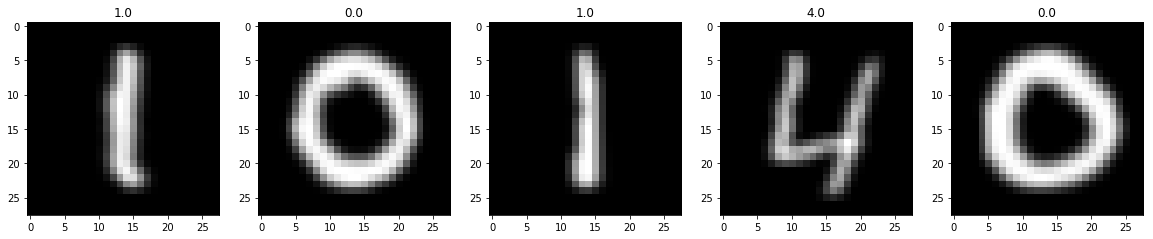

In [8]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5]):
    subplot = fig.add_subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i]);

In [10]:
SZ=28

for i, img in enumerate(test_img):
    m=cv2.moments(img)
    skew = m['mu11']/m['mu02']
    #print ("skew: " + str(skew))
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img2 = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    test_img[i]=img2
    m2=cv2.moments(img2)
    skew2 = m2['mu11']/m2['mu02']
    #print ("skew2: " + str(skew2))

In [11]:
for i, img in enumerate(test_img):
    blur = cv2.GaussianBlur(img,(3,3),0)
    test_img[i]=blur

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [ ]:
def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

In [ ]:
clf = KNeighborsClassifier()
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
score_array = np.zeros(len(n_components_array))


for i, n_components in enumerate(n_components_array):
    pca = PCA(n_component=n_components)
    pca.fit(train_img)
    transform = pca.transform(train_img)
    score_array[i] = evaluate_classifier(clf, transform, train_label, 0.8)
    

In [ ]:
figure(figsize(20,10))
plot(n_components_array,score_array,'k.-')
xscale('log')
xlabel("number of PCA components", size=20)
ylabel("accuracy", size=20)
grid(which="both")

In [ ]:
conf_array = confusion_matrix(test_labels, predictions)
conf_df = pd.DataFrame(conf_array, index = range(10), columns = range(10))
plt.figure(figsize = (10, 10))
sn.heatmap(conf_df, annot=True)

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [9]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [12]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

## Вычисляем угол и длину вектора градиента

In [13]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [16]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

error: /io/opencv/modules/core/src/alloc.cpp:55: error: (-4) Failed to allocate 175616000 bytes in function OutOfMemoryError


In [ ]:
for i, n_components in enumerate(n_components_array):
    pca = PCA(n_component=n_components)
    pca.fit(train_g)
    transform = pca.transform(train_g)
    score_array[i] = evaluate_classifier(clf, transform, train_label, 0.8)

In [ ]:
figure(figsize(20,10))
plot(n_components_array,score_array,'k.-')
xscale('log')
xlabel("number of PCA components", size=20)
ylabel("accuracy", size=20)
grid(which="both")

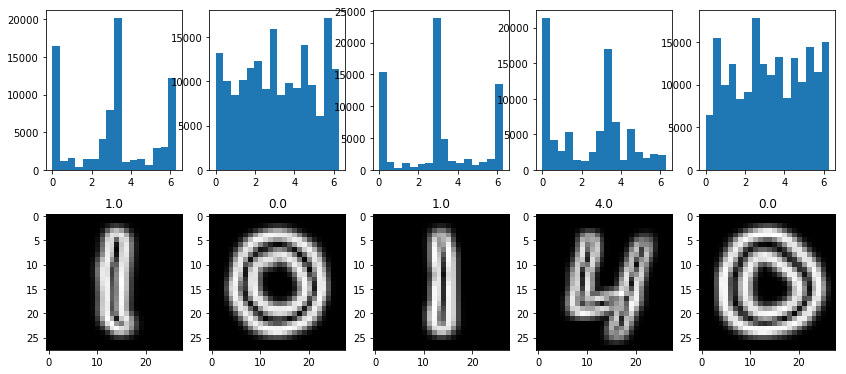

In [17]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

## Вычисляем гистограммы градиентов

In [251]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [252]:
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

## Нормируем вектор гистограммы

In [213]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [253]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

In [ ]:
for i, n_components in enumerate(n_components_array):
    pca = PCA(n_component=n_components)
    pca.fit(train_g)
    transform = pca.transform(train_g)
    score_array[i] = evaluate_classifier(clf, transform, train_label, 0.8)

In [ ]:
figure(figsize(20,10))
plot(n_components_array,score_array,'k.-')
xscale('log')
xlabel("number of PCA components", size=20)
ylabel("accuracy", size=20)
grid(which="both")

## Разбиваем выборку на обучение и валидацию

In [224]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2, random_state=42)

## Вычисляем центроиды каждого из 10 классов

In [225]:
centroids = np.zeros((10, train_hist.shape[1]), dtype=np.float32)

In [226]:
for i in range(10):
    centroids[i] = np.mean(x_train[y_train == i], axis=0)

## Находим ближайший центройд для валидации

In [254]:
pred_val = np.zeros_like(y_val)
for i in range(len(y_val)):
    distances = np.linalg.norm(centroids - x_val[i], axis=1)
    pred_val[i] = np.argmin(distances)

## Оцениваем качество решение на валидационной выборке

In [271]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.426904761905


In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

             precision    recall  f1-score   support

        0.0       0.32      0.12      0.17       816
        1.0       0.60      0.76      0.68       909
        2.0       0.34      0.29      0.31       846
        3.0       0.53      0.47      0.50       937
        4.0       0.34      0.32      0.33       839
        5.0       0.46      0.69      0.55       702
        6.0       0.24      0.46      0.31       785
        7.0       0.74      0.42      0.54       893
        8.0       0.39      0.48      0.43       835
        9.0       0.45      0.26      0.33       838

avg / total       0.45      0.43      0.42      8400



In [256]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[ 94  20  84  35  93  19 224   4 191  52]
 [  0 695   2   0  45   1 140  15  10   1]
 [ 27   0 243 164  13 204  57  16 103  19]
 [ 17   0 112 444   2 240   8   2 102  10]
 [ 13 234   8   3 267   0 201  43  34  36]
 [  3   0  80  91   5 484   3   3  32   1]
 [ 50  21  66  10 110   6 361  14  76  71]
 [  4  99  36  14  63  44 190 377  16  50]
 [ 80   7  66  49  40  45 111   3 402  32]
 [  8  74  26  26 144  11 224  33  73 219]]


## Предсказания на тестовыйх данных

In [266]:
pred_test = np.zeros(len(test_img), np.uint8)
for i in range(len(test_img)):
    distances = np.linalg.norm(centroids - test_hist[i], axis=1)
    pred_test[i] = np.argmin(distances)

## Визуализируем предсказания

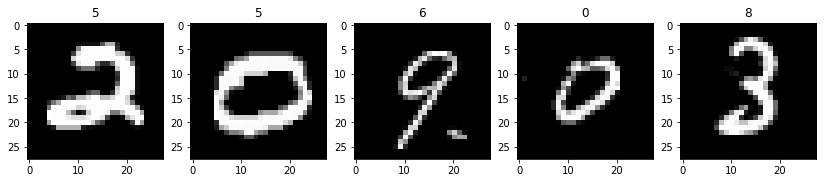

In [267]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [268]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [270]:
# Your submission scored 0.41700